# Plot opto condition raster + PSTH

This is currently used as figure 1 panel g, where the output figure from this code is manually inserted into Hmov_L6S_paper/figs/fig_01.ai.

## TODO

## Setup

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Automatically reload modules to get code changes without restarting kernel
# NOTE: Does not work for DJD table modules
%load_ext autoreload
%autoreload 2

In [3]:
## Define example unit key
# Good opto effect
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 8}
# ukey = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15}

# Lisa first choice
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}
# {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21},

# # Lisa second choice
# {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 5},
# {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 20},
# {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 22}]

## Plot raster+PSTH for figure for Fig1
TODO: This could be put into a function (at least the general parts)

In [4]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })

# Dynamically update plot-specific pars
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
#     'ytick.major.pad': 1, # 3.5
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    })

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


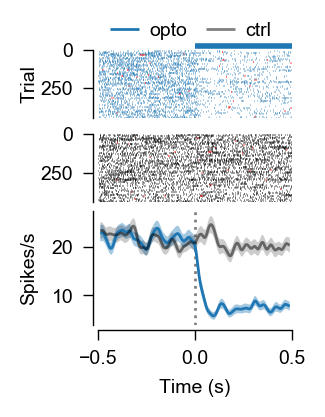

In [15]:
# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
plt.savefig(f'./figs/opto_raster_psth_{ukey["m"]}_s{ukey["s"]}_e{ukey["e"]}_u{ukey["u"]}.pdf')

## Test other units w good responses for panels f,g,h

In [6]:
# Lisa first choice
ukeys = [{'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19},
{'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21},

# Lisa second choice
{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 5},
{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 20},
{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 22}]

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


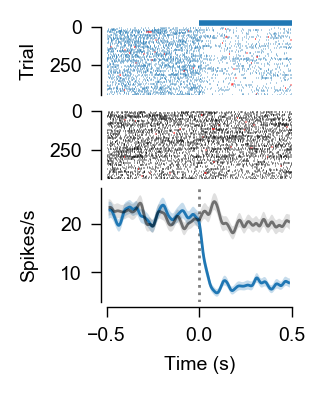

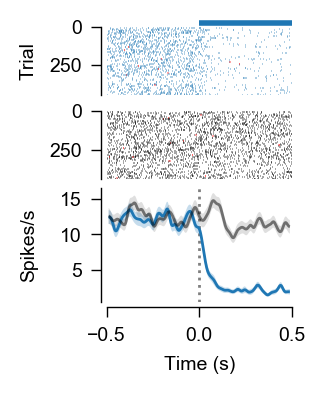

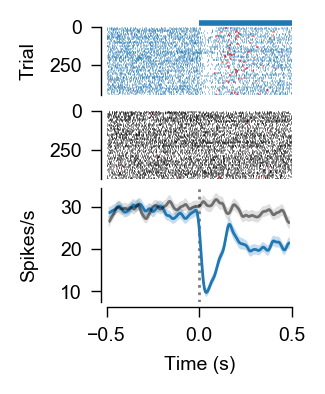

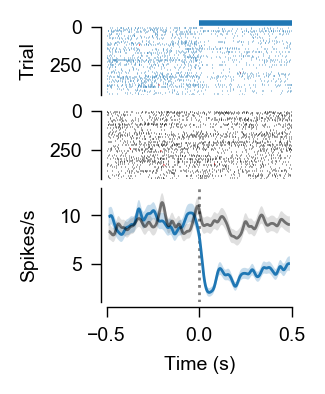

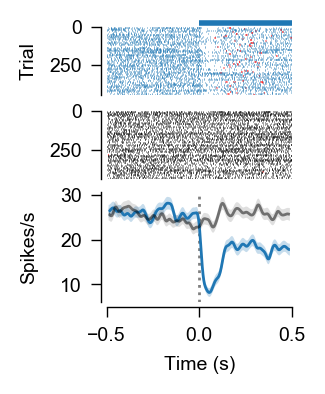

In [12]:
for ukey in ukeys:
    # Plot raster+PSTH figure
    try:
        fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                                  plot_err='sem', legend=False, legend_frame=False, 
                                                                  linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                                  s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                                  figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
    except:
        print('could not plot', ukey)
        continue

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


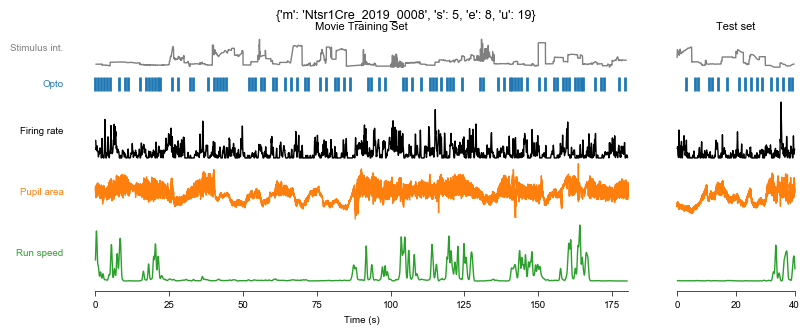

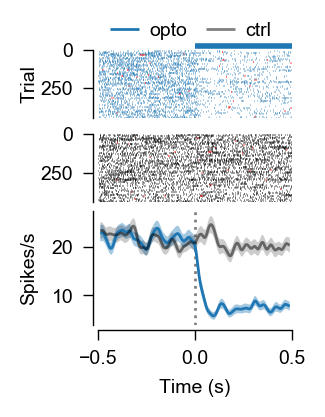

In [22]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}

(HmovUnit() & ukey).plot_multi_traces(train_idx=[4], test_idx=[7], train_trange=None,
                                          linewidth=1, colors=None, alpha_train=1, alpha_test=1,
                                          spines=[], spine_pos=5, suptitle=True, plot_stim_rf=False, 
                                          title_detail=False, figsize=None, save=False, save_fmt='pdf');

# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
# plt.savefig('./figs/opto_raster_psth.pdf')

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


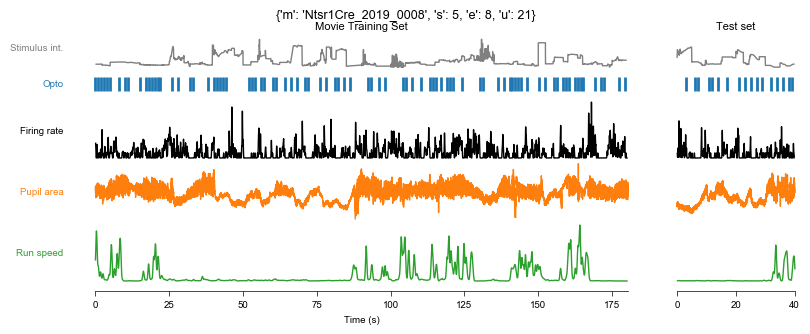

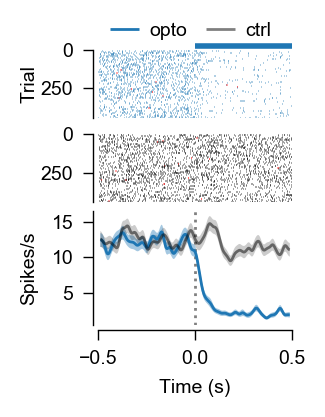

In [17]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21}

(HmovUnit() & ukey).plot_multi_traces(train_idx=[4], test_idx=[7], train_trange=None,
                                          linewidth=1, colors=None, alpha_train=1, alpha_test=1,
                                          spines=[], spine_pos=5, suptitle=True, plot_stim_rf=False, 
                                          title_detail=False, figsize=None, save=False, save_fmt='pdf');

# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
# plt.savefig('./figs/opto_raster_psth.pdf')


fig, axs = (HmovUnit() & ukey).plot_locomotion_raster_psth();
# Manual plot edits
for ax in axs[0]:
    ax.set_ylabel('')
axs[1].legend(['run', 'sit'], ncol=2, frameon=False, loc='lower left',
              bbox_to_anchor=(0, 2.4),
              columnspacing=1, handlelength=1.5, handletextpad=0.5,
              borderpad=0.1)
# plt.savefig('./figs/raster_psth_locomotion.pdf')

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


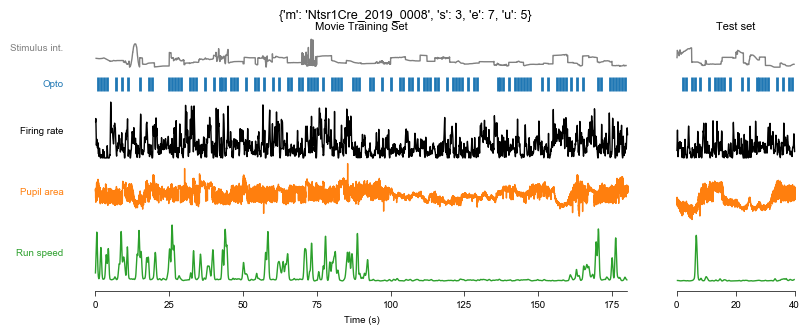

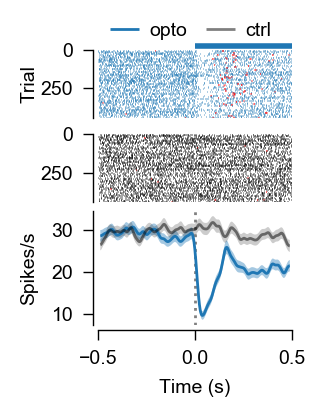

In [18]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 5}
(HmovUnit() & ukey).plot_multi_traces(train_idx=[0], test_idx=[5], train_trange=None,
                                          linewidth=1, colors=None, alpha_train=1, alpha_test=1,
                                          spines=[], spine_pos=5, suptitle=True, plot_stim_rf=False, 
                                          title_detail=False, figsize=None, save=False, save_fmt='pdf');

# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
# plt.savefig('./figs/opto_raster_psth.pdf')

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


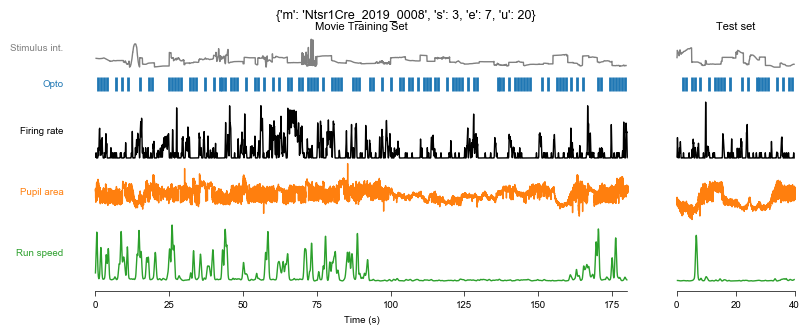

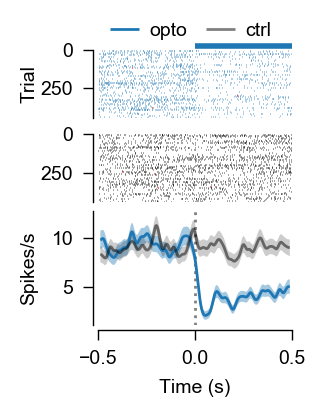

In [20]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 20}
(HmovUnit() & ukey).plot_multi_traces(train_idx=[0], test_idx=[5], train_trange=None,
                                          linewidth=1, colors=None, alpha_train=1, alpha_test=1,
                                          spines=[], spine_pos=5, suptitle=True, plot_stim_rf=False, 
                                          title_detail=False, figsize=None, save=False, save_fmt='pdf');

# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
# plt.savefig('./figs/opto_raster_psth.pdf')

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


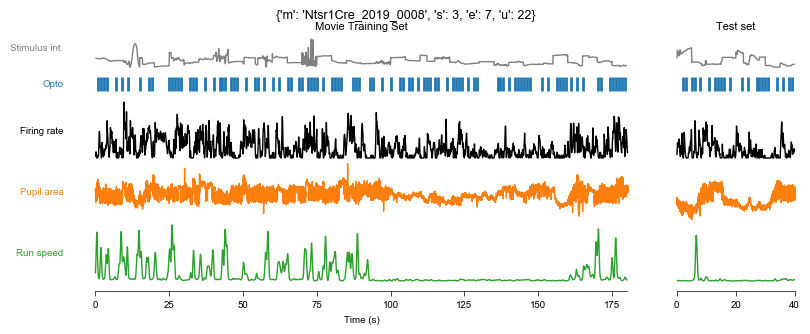

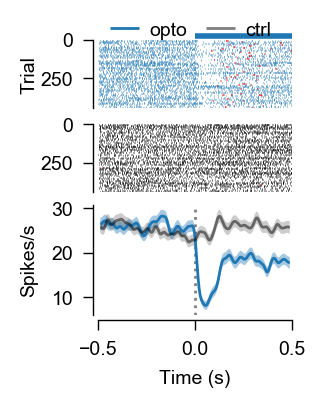

In [19]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 22}
(HmovUnit() & ukey).plot_multi_traces(train_idx=[0], test_idx=[5], train_trange=None,
                                          linewidth=1, colors=None, alpha_train=1, alpha_test=1,
                                          spines=[], spine_pos=5, suptitle=True, plot_stim_rf=False, 
                                          title_detail=False, figsize=None, save=False, save_fmt='pdf');

# Plot raster+PSTH figure
fig, axs = (HmovUnit() & ukey).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim', offsets=[-0.5, -0.5],
                                                          plot_err='sem', legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], alphas=[1.0, 0.5, 1.0, 0.5], 
                                                          s=0.25, l=4, eventfill=False, eventbar=True, evbarpos=25, 
                                                          figsize=[3.7, 4.5], dpi=200, hspace=0.05, hpad=0., hratios=[0.45,0.55]);
# Manual plot edits  
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
#       but could be done by inserting a third axis on top
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
# plt.savefig('./figs/opto_raster_psth.pdf')